# Titanic: Machine Learning from Disaster

In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.models import Model

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv


In [15]:
# Read in datasets
data_train = pd.read_csv("/kaggle/input/titanic/train.csv")
data_test = pd.read_csv("/kaggle/input/titanic/test.csv")
data_test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## Explore Data

In [16]:
# Investigate data
data_train.info()
data_test.info()

totalEntries = len(data_train) + len(data_test)
print('Data split: %f train, %f test' %(len(data_train)/totalEntries, len(data_test)/totalEntries))

data_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# Gender
women = data_train.loc[data_train.Sex == 'female']['Survived']
men = data_train.loc[data_train.Sex == 'male']['Survived']
rate_women = sum(women) / len(women)
rate_men = sum(men) / len(men)
print('women survival rate = %f' %rate_women)
print('men survival rate = %f' %rate_men)

women survival rate = 0.742038
men survival rate = 0.188908


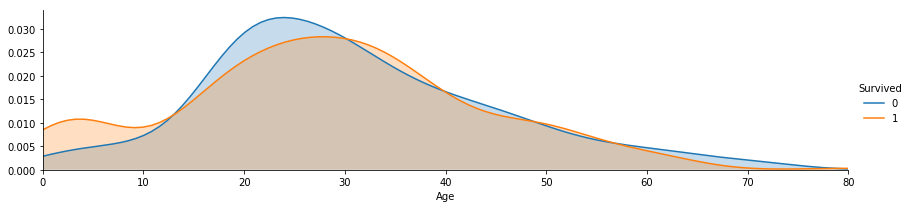

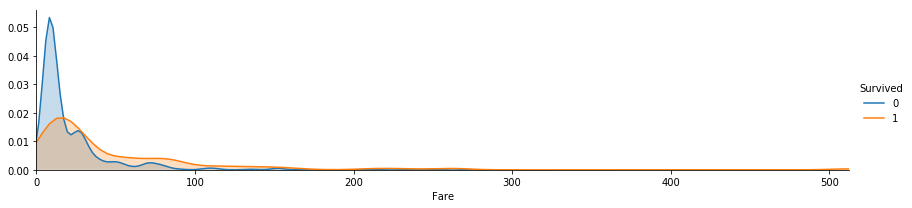

In [18]:
# Age
pt = sns.FacetGrid(data_train, hue='Survived', aspect=4)
pt.map(sns.kdeplot, 'Age', shade=True)
pt.set(xlim=(0 , data_train['Age'].max()))
pt.add_legend()

# Fare
pt = sns.FacetGrid(data_train, hue='Survived', aspect=4)
pt.map(sns.kdeplot, 'Fare', shade=True)
pt.set(xlim=(0 , data_train['Fare'].max()))
pt.add_legend()

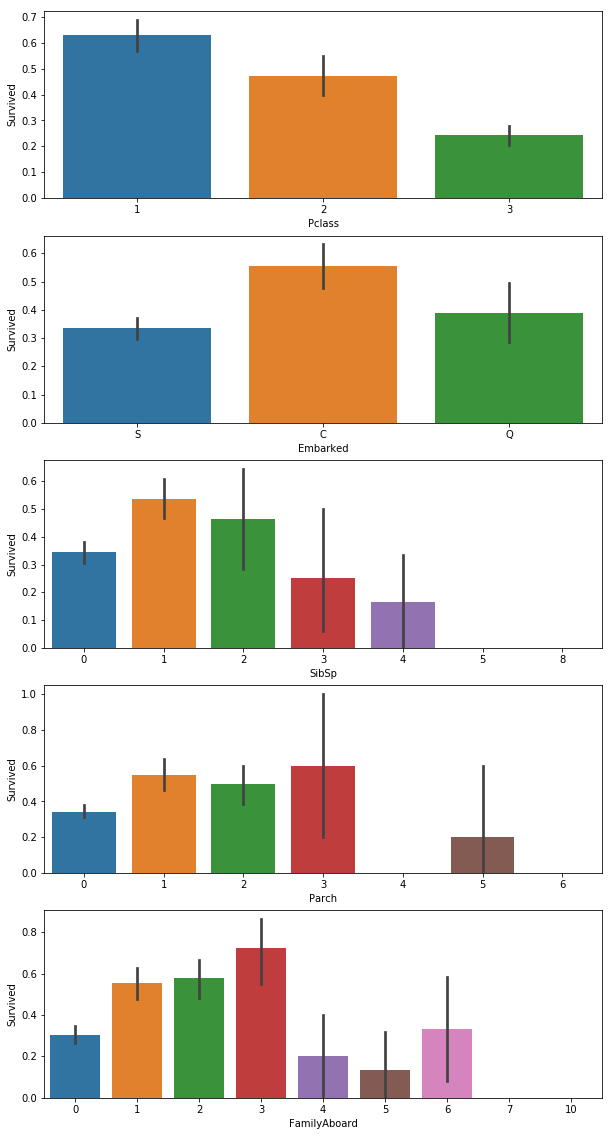

In [19]:
fig, ax = plt.subplots(5, 1, figsize=(10, 20))

sns.barplot(x='Pclass', y='Survived', data=data_train, ax=ax[0])
sns.barplot(x='Embarked', y='Survived', data=data_train, ax=ax[1])
sns.barplot(x='SibSp', y='Survived', data=data_train, ax=ax[2]) # siblings/spouce aboard
sns.barplot(x='Parch', y='Survived', data=data_train, ax=ax[3]) # parents/children aboard

# Look at new feature
data_train['FamilyAboard'] = data_train['SibSp'] + data_train['Parch']
sns.barplot(x='FamilyAboard', y='Survived', data=data_train, ax=ax[4])
fig.show()

## Machine Learning

In [20]:
# Functions for processing data
'''
Processes input of dataset
data is a Pandas DataFrame
returns DataFrame of input feature values
'''
def processInput(data):
    X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]    
    # Enumerate labeled data
    X['Sex'].replace('female', 0, inplace=True)
    X['Sex'].replace('male', 1, inplace=True)
    X['Embarked'].replace('S', 0, inplace=True)
    X['Embarked'].replace('C', 1, inplace=True)
    X['Embarked'].replace('Q', 2, inplace=True)
    # Fill missing data
    X['Embarked'].fillna(3, inplace=True) # create new category
    X['MissingAge'] = X['Age'].isnull().astype(int) # create new feature
    X['Age'].fillna(0, inplace=True)
    X['Fare'].fillna(X['Fare'].mode()[0], inplace=True) # use mode
    # Normalize data
    X = (X - X.mean()) / X.std()
    return X

'''
Processes output of dataset
data is a Pandas DataFrame
returns DataFrame of output
'''
def processOutput(data):
    return data['Survived'].values

'''
Split training data into training and development datasets
data is initial Pandas DataFrame
fractionDev is fraction of data to be in development dataset
returns training data and development data DataFrames
'''
def splitTrainData(data, fractionDev):
    mask = np.random.rand(len(data)) < fractionDev
    data_train = data[~mask]
    data_dev = data[mask]
    return data_train, data_dev

def processData(data_train, data_test, fractionDev):
    data_train, data_dev = splitTrainData(data_train, fractionDev)
    X_train = processInput(data_train)
    X_dev = processInput(data_dev)
    X_test = processInput(data_test)
    Y_train = processOutput(data_train)
    Y_dev = processOutput(data_dev)
    return X_train, Y_train, X_dev, Y_dev, X_test

In [26]:
'''
Keras neural network model
'''
def model(inputShape):
    X_input = Input(inputShape)
    X = Dense(10, activation='relu')(X_input)
    X = Dropout(.1)(X)
    X = BatchNormalization()(X)
    X = Dense(5, activation='relu')(X)
    X = Dropout(.1)(X)
    X = BatchNormalization()(X)
    X = Dense(1, activation='sigmoid')(X)
    
    model = Model(inputs=X_input, outputs=X)
    return model

In [22]:
# Split and process training data
X_train, Y_train, X_dev, Y_dev, X_test = processData(data_train, data_test, 0.1)
X_train.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,MissingAge
0,0.839189,0.743034,-0.111690,0.422518,-0.475806,-0.504741,-0.559315,-0.496214
1,-1.534602,-1.344170,0.797471,0.422518,-0.475806,0.764605,1.033944,-0.496214
2,0.839189,-1.344170,0.115600,-0.467631,-0.475806,-0.491361,-0.559315,-0.496214
3,-1.534602,-1.344170,0.627003,0.422518,-0.475806,0.404153,-0.559315,-0.496214
4,0.839189,0.743034,0.627003,-0.467631,-0.475806,-0.488883,-0.559315,-0.496214


In [27]:
# Create and train model
nn = model(inputShape=(X_train.shape[1],))
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = nn.fit(X_train, Y_train, validation_data=(X_dev, Y_dev), batch_size=32, epochs=150)

Train on 809 samples, validate on 82 samples
Epoch 1/150
809/809 [==============================] - 1s 925us/step - loss: 0.7299 - accuracy: 0.6168 - val_loss: 0.6687 - val_accuracy: 0.6829
Epoch 2/150
809/809 [==============================] - 0s 130us/step - loss: 0.6523 - accuracy: 0.6663 - val_loss: 0.6213 - val_accuracy: 0.7317
Epoch 3/150
809/809 [==============================] - 0s 124us/step - loss: 0.5854 - accuracy: 0.7379 - val_loss: 0.5793 - val_accuracy: 0.7683
Epoch 4/150
809/809 [==============================] - 0s 125us/step - loss: 0.5359 - accuracy: 0.7775 - val_loss: 0.5461 - val_accuracy: 0.8049
Epoch 5/150
809/809 [==============================] - 0s 119us/step - loss: 0.5201 - accuracy: 0.7837 - val_loss: 0.5188 - val_accuracy: 0.8171
Epoch 6/150
809/809 [==============================] - 0s 124us/step - loss: 0.4924 - accuracy: 0.8010 - val_loss: 0.4950 - val_accuracy: 0.8293
Epoch 7/150
809/809 [==============================] - 0s 134us/step - loss: 0.4792 -

Epoch 57/150
809/809 [==============================] - 0s 125us/step - loss: 0.3902 - accuracy: 0.8356 - val_loss: 0.4363 - val_accuracy: 0.8171
Epoch 58/150
809/809 [==============================] - 0s 123us/step - loss: 0.4138 - accuracy: 0.8282 - val_loss: 0.4336 - val_accuracy: 0.8293
Epoch 59/150
809/809 [==============================] - 0s 117us/step - loss: 0.4051 - accuracy: 0.8257 - val_loss: 0.4322 - val_accuracy: 0.8171
Epoch 60/150
809/809 [==============================] - 0s 126us/step - loss: 0.4061 - accuracy: 0.8257 - val_loss: 0.4379 - val_accuracy: 0.8293
Epoch 61/150
809/809 [==============================] - 0s 129us/step - loss: 0.3977 - accuracy: 0.8269 - val_loss: 0.4373 - val_accuracy: 0.8049
Epoch 62/150
809/809 [==============================] - 0s 128us/step - loss: 0.3901 - accuracy: 0.8331 - val_loss: 0.4325 - val_accuracy: 0.8171
Epoch 63/150
809/809 [==============================] - 0s 130us/step - loss: 0.3940 - accuracy: 0.8393 - val_loss: 0.4337 -

809/809 [==============================] - 0s 123us/step - loss: 0.3833 - accuracy: 0.8381 - val_loss: 0.5044 - val_accuracy: 0.8171
Epoch 114/150
809/809 [==============================] - 0s 123us/step - loss: 0.3635 - accuracy: 0.8455 - val_loss: 0.5089 - val_accuracy: 0.8293
Epoch 115/150
809/809 [==============================] - 0s 118us/step - loss: 0.3675 - accuracy: 0.8381 - val_loss: 0.4967 - val_accuracy: 0.8171
Epoch 116/150
809/809 [==============================] - 0s 124us/step - loss: 0.3755 - accuracy: 0.8554 - val_loss: 0.4987 - val_accuracy: 0.8293
Epoch 117/150
809/809 [==============================] - 0s 118us/step - loss: 0.3758 - accuracy: 0.8541 - val_loss: 0.4958 - val_accuracy: 0.8293
Epoch 118/150
809/809 [==============================] - 0s 115us/step - loss: 0.3834 - accuracy: 0.8319 - val_loss: 0.5014 - val_accuracy: 0.8293
Epoch 119/150
809/809 [==============================] - 0s 115us/step - loss: 0.3794 - accuracy: 0.8393 - val_loss: 0.5094 - val_ac

82/82 [==============================] - 0s 85us/step


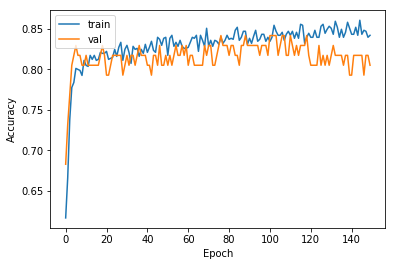

Train accuracy = 0.856613
Dev accuracy = 0.804878


In [28]:
# Evaluate model
_, trainAccuracy = nn.evaluate(X_train, Y_train)
_, devAccuracy = nn.evaluate(X_dev, Y_dev)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
print('Train accuracy = %f' %trainAccuracy)
print('Dev accuracy = %f' %devAccuracy)

In [25]:
# Generate results for submission
Y_pred = nn.predict(X_test)
output = pd.DataFrame({'PassengerId': data_test.PassengerId, 'Survived': (Y_pred[:, 0] > 0.5).astype(int)})
output.to_csv('submission.csv', index=False)

NameError: name 'test_data' is not defined